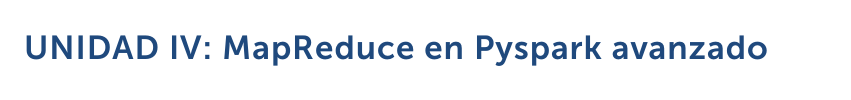

In [1]:
%load_ext autotime

time: 0 ns (started: 2024-05-14 20:22:01 -03:00)


In [2]:
import findspark # Este módulo proporciona una función para localizar la instalación de Spark en el sistema.
findspark.init() # Inicializa el entorno de Spark.
findspark.find() # Devuelve la ruta al directorio de Spark. 

'C:\\Users\\guti_\\anaconda3\\envs\\pyspark-env\\Lib\\site-packages\\pyspark'

time: 235 ms (started: 2024-05-14 20:22:01 -03:00)


In [36]:
from pyspark import SQLContext

time: 0 ns (started: 2024-05-14 21:04:44 -03:00)


In [3]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc=SparkContext.getOrCreate()
spark=SparkSession(sc)

time: 4.11 s (started: 2024-05-14 20:22:01 -03:00)


In [4]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

time: 0 ns (started: 2024-05-14 20:22:06 -03:00)


## 4.1.- Joins en PySpark

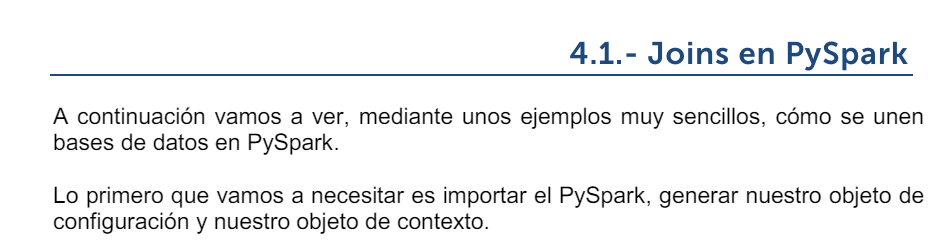

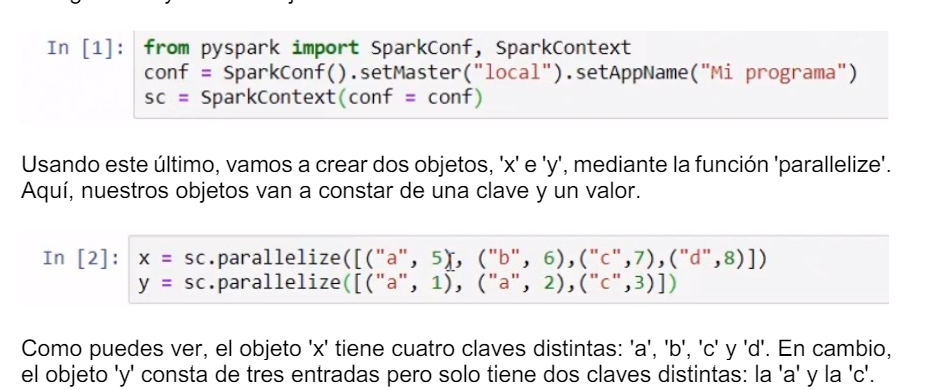

In [5]:
x=sc.parallelize([("a",5),("b",6),("c",7),("d",8)])
y=sc.parallelize([("a",1),("a",2),("c",3)])

time: 312 ms (started: 2024-05-14 20:22:06 -03:00)


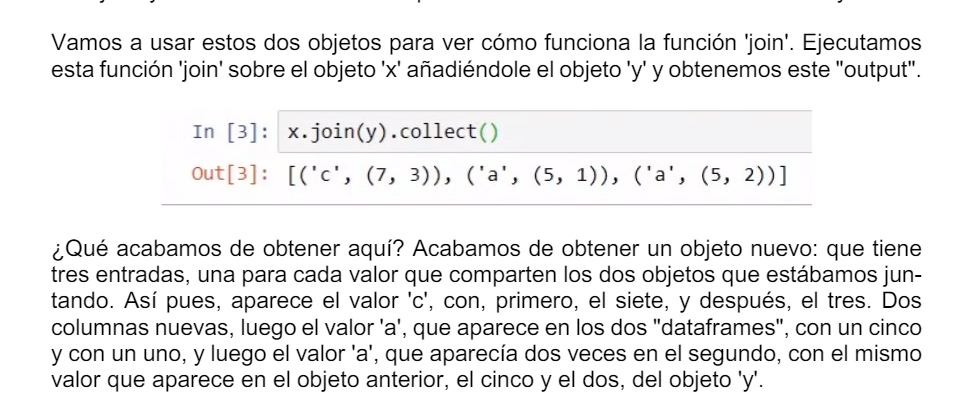

In [6]:
test1=x.join(y)
test1

PythonRDD[9] at RDD at PythonRDD.scala:53

time: 109 ms (started: 2024-05-14 20:22:06 -03:00)


In [7]:
#test1.collect()

[('c', (7, 3)), ('a', (5, 1)), ('a', (5, 2))]

time: 1min 33s (started: 2024-05-14 20:22:06 -03:00)


In [8]:
test1.take(10)

[('c', (7, 3)), ('a', (5, 1)), ('a', (5, 2))]

time: 32 s (started: 2024-05-14 20:23:40 -03:00)


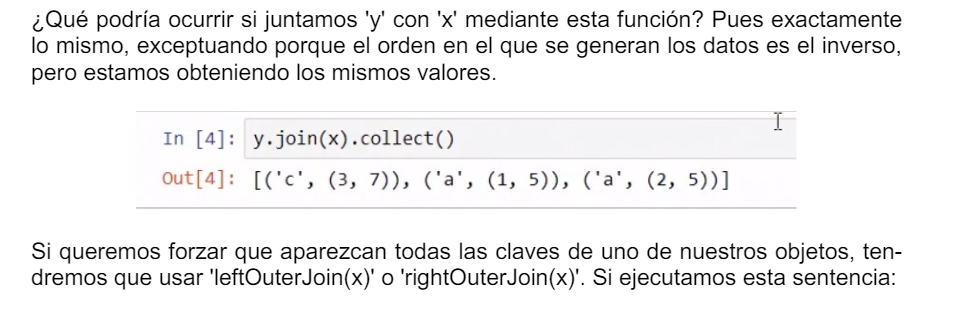

In [9]:
test2=y.join(x)
test2

PythonRDD[21] at RDD at PythonRDD.scala:53

time: 47 ms (started: 2024-05-14 20:24:12 -03:00)


In [10]:
test2.take(10)

[('c', (3, 7)), ('a', (1, 5)), ('a', (2, 5))]

time: 1min 33s (started: 2024-05-14 20:24:12 -03:00)


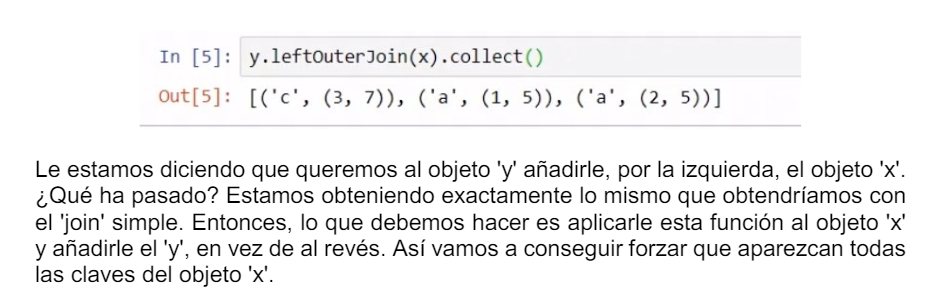

In [11]:
left_join=y.leftOuterJoin(x)
left_join

PythonRDD[33] at RDD at PythonRDD.scala:53

time: 32 ms (started: 2024-05-14 20:25:45 -03:00)


In [14]:
left_join.collect()

[('c', (3, 7)), ('a', (1, 5)), ('a', (2, 5))]

time: 1min 4s (started: 2024-05-14 20:29:00 -03:00)


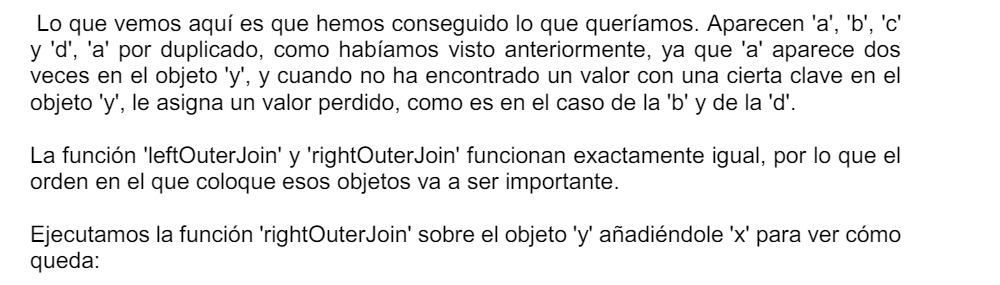

In [20]:
right_join=x.rightOuterJoin(y)
right_join

PythonRDD[50] at RDD at PythonRDD.scala:53

time: 31 ms (started: 2024-05-14 20:34:01 -03:00)


In [19]:
right_join.collect()

[('d', (8, None)),
 ('b', (6, None)),
 ('c', (7, 3)),
 ('a', (5, 1)),
 ('a', (5, 2))]

time: 1min 2s (started: 2024-05-14 20:32:58 -03:00)


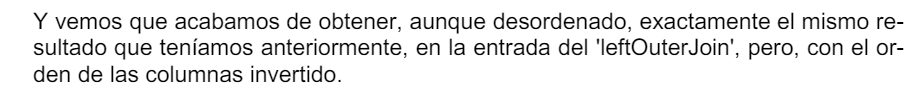

## 4.2.- Acumuladores.

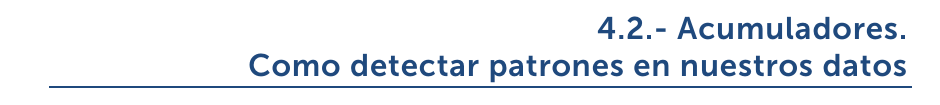

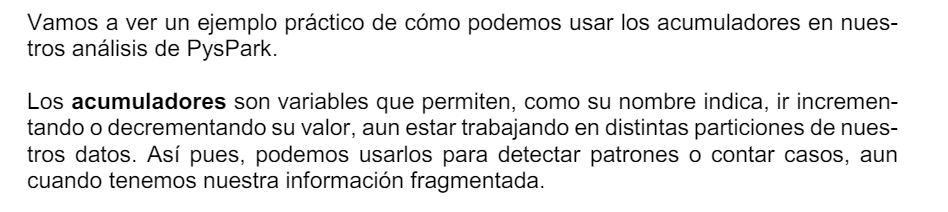

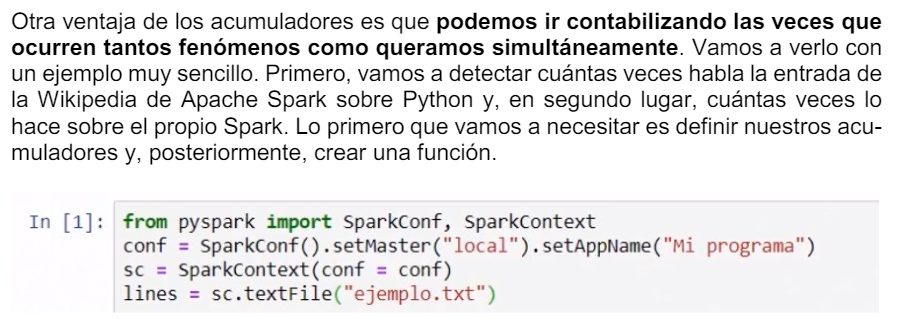

In [21]:
file="file.txt"

time: 0 ns (started: 2024-05-14 20:35:01 -03:00)


In [22]:
lines=sc.textFile(file)
lines

file.txt MapPartitionsRDD[52] at textFile at <unknown>:0

time: 141 ms (started: 2024-05-14 20:35:07 -03:00)


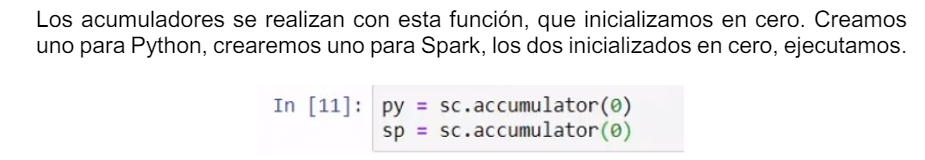

In [23]:
py=sc.accumulator(0)
sp=sc.accumulator(0)

time: 0 ns (started: 2024-05-14 20:36:07 -03:00)


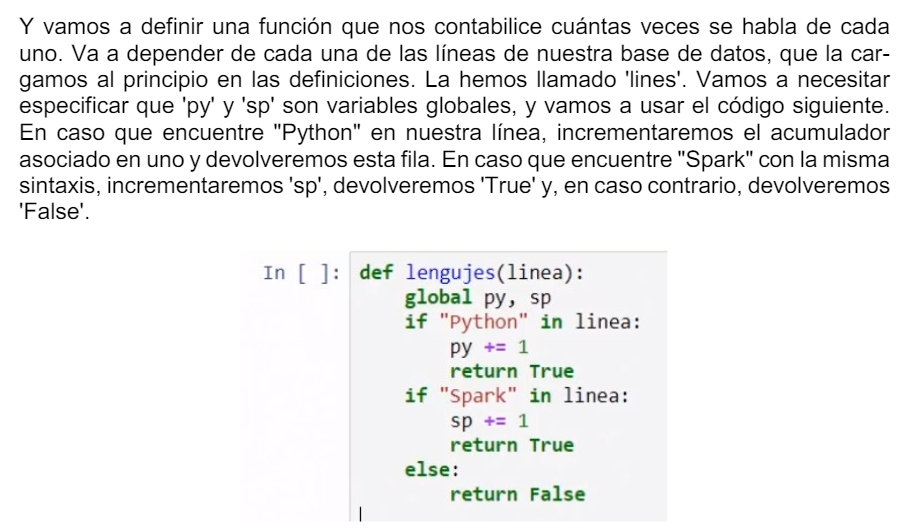

In [29]:
def lenguajes(linea):
    global py,sp
    if "celular" in linea:
        py+=1
        return True
    if "smartphone" in linea:
        sp+=1
        return True
    else:
        return True

time: 0 ns (started: 2024-05-14 20:40:59 -03:00)


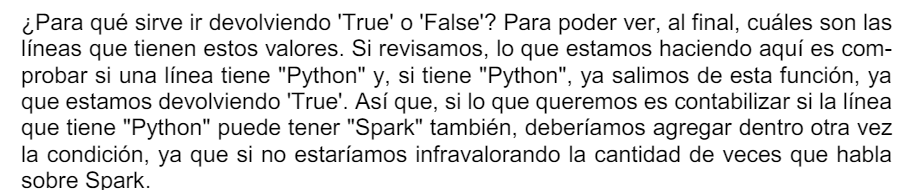

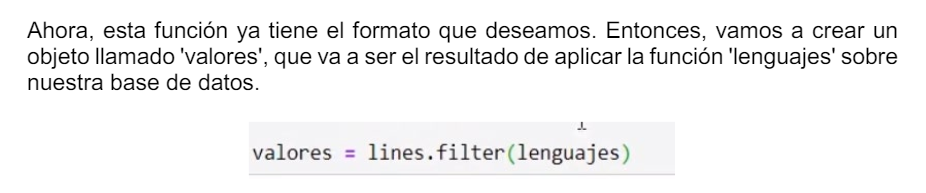

In [30]:
valores=lines.filter(lenguajes)

time: 0 ns (started: 2024-05-14 20:41:01 -03:00)


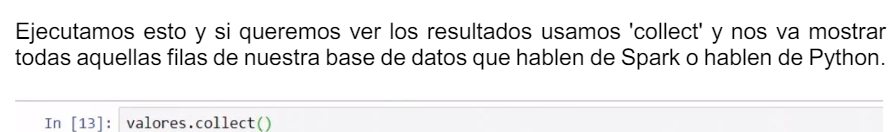

In [31]:
valores.collect()

['El teléfono inteligente (del inglés smartphone) es un dispositivo móvil ',
 'que combina las funciones de un teléfono móvil y de un PDA.',
 ' Estos dispositivos funcionan sobre una plataforma informática móvil, ',
 'con mayor capacidad de almacenar y capaz de realizar tareas simultáneamente, ',
 'tareas que realiza un ordenador o una computadora, y con una mayor conectividad que un teléfono convencional.',
 'Debido a ello, estos teléfonos reciben el nombre de inteligente, ',
 'que se utiliza más bien con fines comerciales para distinguir de los teléfonos móviles o celulares básicos. ',
 'El antecedente más cercano de estos dispositivos son los PDA.',
 'Por otra parte, los teléfonos inteligentes modernos tienen sus orígenes a fines de la década de los 2000 ',
 'y se popularizaron rápidamente en el transcurso de la década de 2010. ',
 'A principios de 2013 los teléfonos inteligentes superan en venta a los teléfonos celulares básicos/convencionales, ',
 'revolucionando para siempre la t

time: 2.09 s (started: 2024-05-14 20:41:03 -03:00)


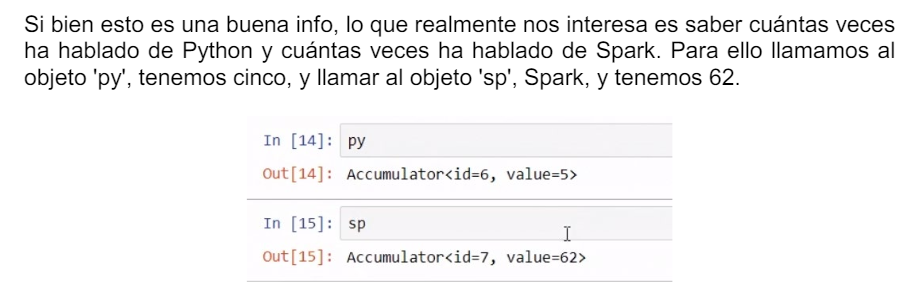

In [32]:
py #celular

Accumulator<id=0, value=5>

time: 0 ns (started: 2024-05-14 20:41:07 -03:00)


In [33]:
sp # smartphone

Accumulator<id=1, value=1>

time: 0 ns (started: 2024-05-14 20:41:08 -03:00)


## 4.3.- Como construir funciones Map

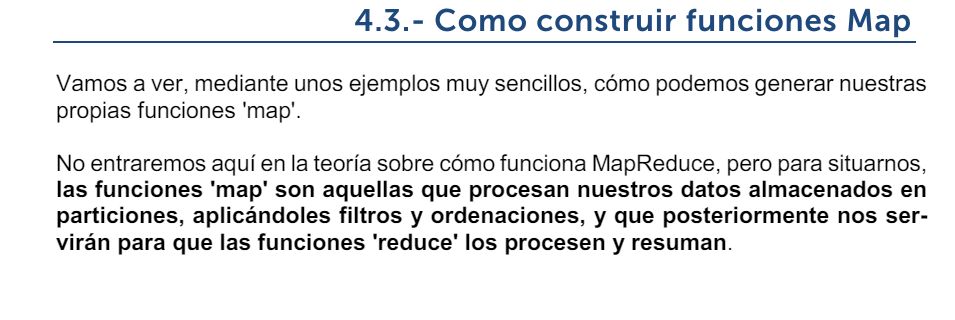

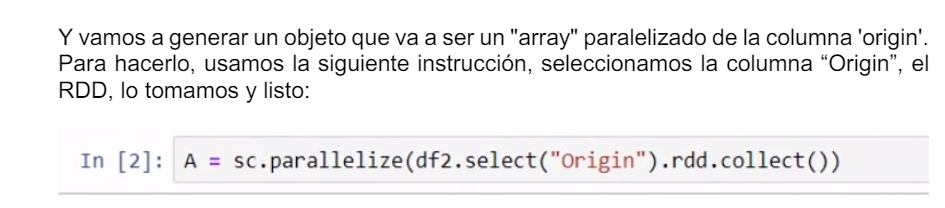

In [39]:
location_df="celulares_PySpark.csv"

time: 0 ns (started: 2024-05-14 21:05:50 -03:00)


In [40]:
sqlContext=SQLContext(sc)
dfspark=sqlContext.read.format("csv").option("header","true").option("inferschema","true").load(location_df)

C:\Users\guti_\anaconda3\envs\pyspark-env\Lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


time: 3.59 s (started: 2024-05-14 21:05:51 -03:00)


In [42]:
dfspark

DataFrame[modelo: string, precio: double, rating: int, sim: string, procesador: string, bateria: int, memoria: string, os: string, 5G: boolean, NFC: boolean, carga_rapida: boolean, almacenamiento: int, Memory Card: boolean, ram: int, rom: int]

time: 16 ms (started: 2024-05-14 21:06:52 -03:00)


In [71]:
df2=dfspark.select(["modelo","precio","procesador","memoria"])

time: 15 ms (started: 2024-05-14 21:37:31 -03:00)


In [96]:
df2.show()

+--------------------+------+--------------------+-------------+
|              modelo|precio|          procesador|      memoria|
+--------------------+------+--------------------+-------------+
|       OnePlus 11 5G|657.59|   Snapdragon 8 Gen2|Not Supported|
|OnePlus Nord CE 2...| 239.0|      Snapdragon 695|       Hybrid|
|Samsung Galaxy A1...|197.27|         Exynos 1330|    Supported|
|Motorola Moto G62 5G|179.33|     Snapdragon  695|       Hybrid|
|  Realme 10 Pro Plus| 298.9|      Dimensity 1080|Not Supported|
|Samsung Galaxy F2...|203.25|    Snapdragon  750G|    Supported|
|     Apple iPhone 14|789.11|          Bionic A15|Not Supported|
|Xiaomi Redmi Note...|358.68|      Dimensity 1080|Not Supported|
|     Nothing Phone 1|319.82|Snapdragon 778G Plus|            -|
|  OnePlus Nord 2T 5G|346.72|     Dimensity  1300|            -|
|       Realme 10 Pro|227.16|      Snapdragon 695|    Supported|
|            Oppo A78|227.16|    Dimensity 700 5G|    Supported|
|Xiaomi Redmi Note...|296

In [97]:
A=sc.parallelize(df2.select("memoria").rdd.collect())

time: 109 ms (started: 2024-05-14 22:20:27 -03:00)


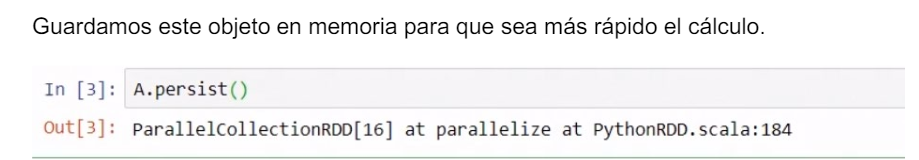

In [98]:
A.persist()

ParallelCollectionRDD[155] at readRDDFromFile at PythonRDD.scala:287

time: 0 ns (started: 2024-05-14 22:20:27 -03:00)


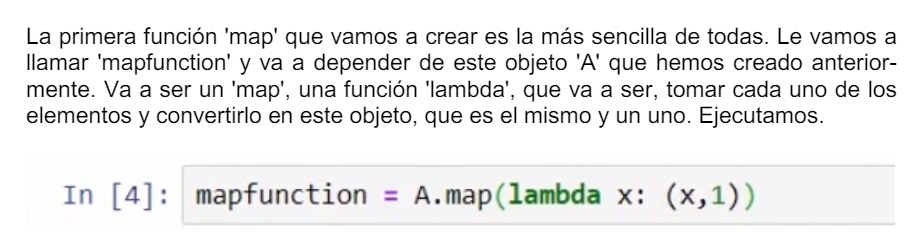

In [99]:
mapfunction=A.map(lambda x:(x,1))

time: 0 ns (started: 2024-05-14 22:20:27 -03:00)


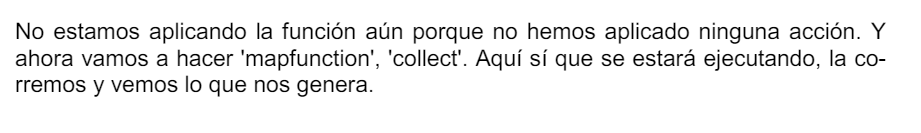

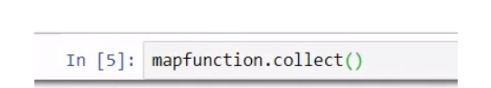

In [100]:
mapfunction.collect()

[(Row(memoria='Not Supported'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='Not Supported'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='Not Supported'), 1),
 (Row(memoria='Not Supported'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='Not Supported'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='Not Supported'), 1),
 (Row(memoria='Hybrid'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='Not Supported'), 1),
 (Row(memoria='Supported'), 1),
 (Row(memoria='Not Supported'), 1),
 (Row(memoria='Hybrid'), 1),
 (R

time: 17.3 s (started: 2024-05-14 22:20:27 -03:00)


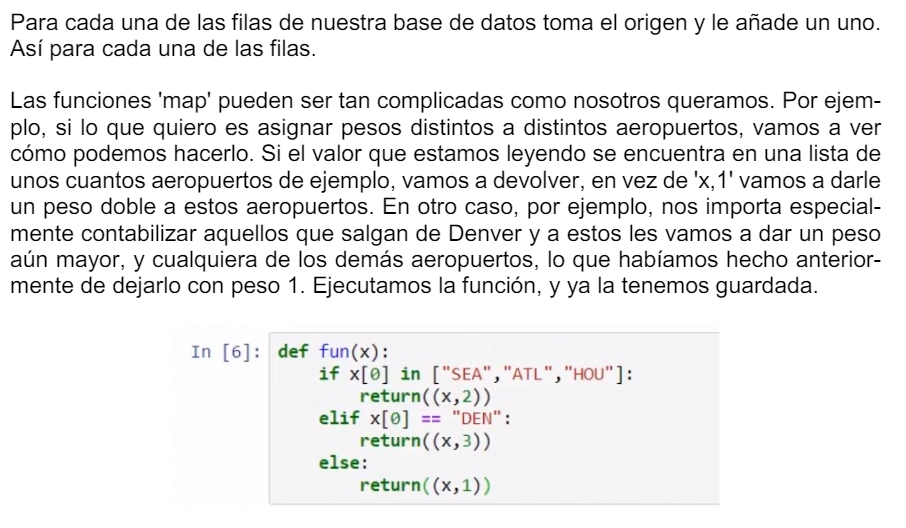

In [101]:
def fun(x):
    #if x[0] in ["OnePlus","Samsung ","Xiaomi"]:
    if x[0].startswith(("Supported", "Not Supported")):
        return ((x,2))
    elif x[0].startswith("Hybrid"):
        return ((x,3))
    else:
        return ((x,1))

time: 0 ns (started: 2024-05-14 22:20:45 -03:00)


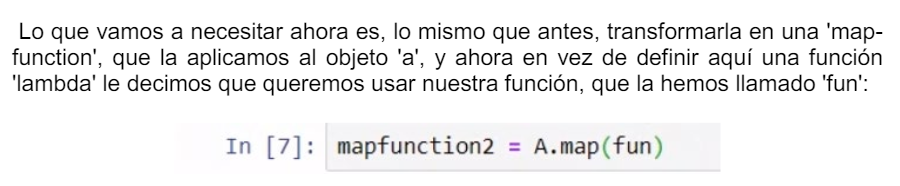

In [102]:
mapfunction2=A.map(fun)

time: 0 ns (started: 2024-05-14 22:20:45 -03:00)


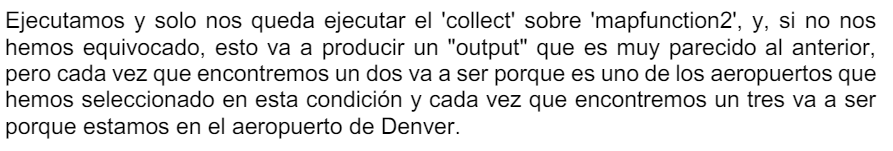

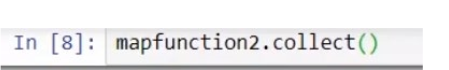

In [103]:
mapfunction2.collect()

[(Row(memoria='Not Supported'), 2),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='Supported'), 2),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='Not Supported'), 2),
 (Row(memoria='Supported'), 2),
 (Row(memoria='Not Supported'), 2),
 (Row(memoria='Not Supported'), 2),
 (Row(memoria='-'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Supported'), 2),
 (Row(memoria='Supported'), 2),
 (Row(memoria='-'), 1),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='Not Supported'), 2),
 (Row(memoria='Supported'), 2),
 (Row(memoria='-'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Supported'), 2),
 (Row(memoria='-'), 1),
 (Row(memoria='-'), 1),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='-'), 1),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='Not Supported'), 2),
 (Row(memoria='Hybrid'), 3),
 (Row(memoria='Supported'), 2),
 (Row(memoria='Not Supported'), 2),
 (Row(memoria='Supported'), 2),
 (Row(memoria='Not Supported'), 2),
 (Row(memoria='Hybrid'), 3),
 (R

time: 16.4 s (started: 2024-05-14 22:20:45 -03:00)


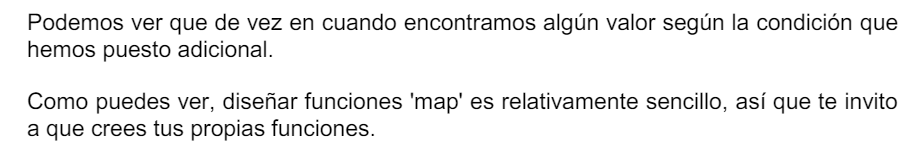

## 4.4.- Como construir funciones Reduce

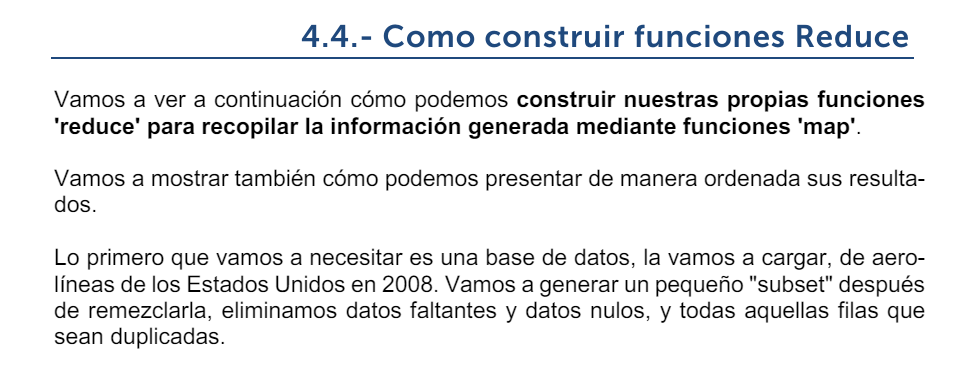

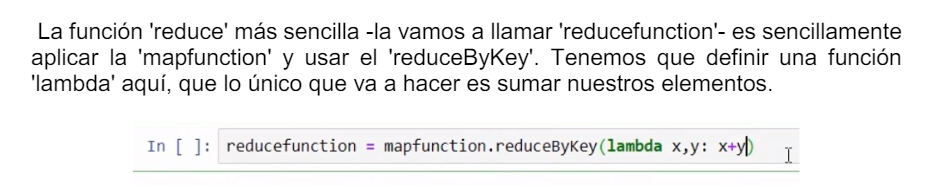

In [104]:
reducefunction=mapfunction.reduceByKey(lambda x,y: x+y)

time: 16 ms (started: 2024-05-14 22:21:01 -03:00)


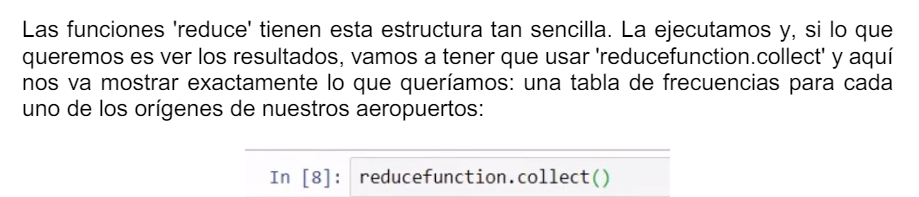

In [105]:
reducefunction.collect()

[(Row(memoria='Hybrid'), 138),
 (Row(memoria='-'), 191),
 (Row(memoria='Supported'), 433),
 (Row(memoria='Not Supported'), 107)]

time: 32.7 s (started: 2024-05-14 22:21:01 -03:00)


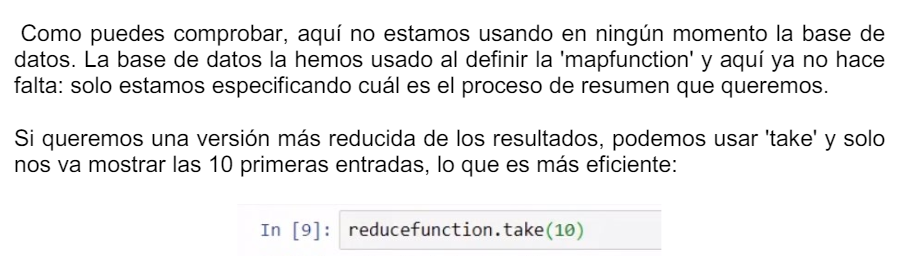

In [106]:
reducefunction.take(10)

[(Row(memoria='Hybrid'), 138),
 (Row(memoria='-'), 191),
 (Row(memoria='Supported'), 433),
 (Row(memoria='Not Supported'), 107)]

time: 17 s (started: 2024-05-14 22:21:34 -03:00)


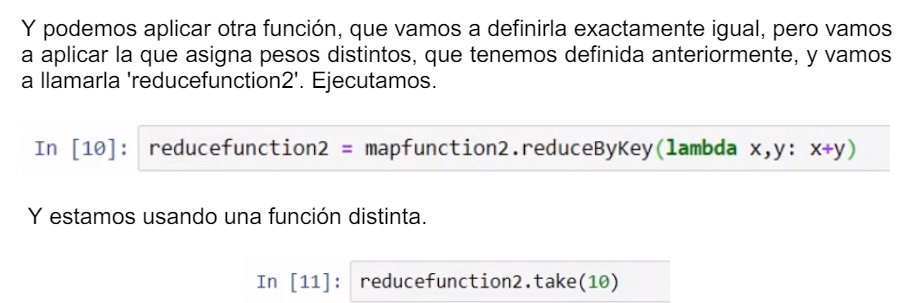

In [107]:
reducefunction2=mapfunction2.reduceByKey(lambda x,y: x+y)

time: 16 ms (started: 2024-05-14 22:21:51 -03:00)


In [108]:
reducefunction2.take(10)

[(Row(memoria='Hybrid'), 414),
 (Row(memoria='-'), 191),
 (Row(memoria='Supported'), 866),
 (Row(memoria='Not Supported'), 214)]

time: 33.5 s (started: 2024-05-14 22:21:51 -03:00)


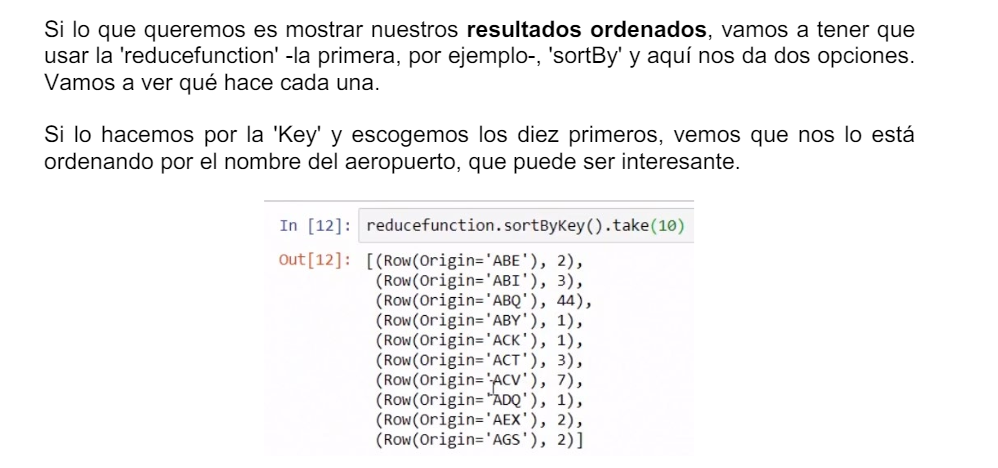

In [109]:
reducefunction.sortByKey().take(10)

[(Row(memoria='-'), 191),
 (Row(memoria='Hybrid'), 138),
 (Row(memoria='Not Supported'), 107),
 (Row(memoria='Supported'), 433)]

time: 1min 9s (started: 2024-05-14 23:12:23 -03:00)


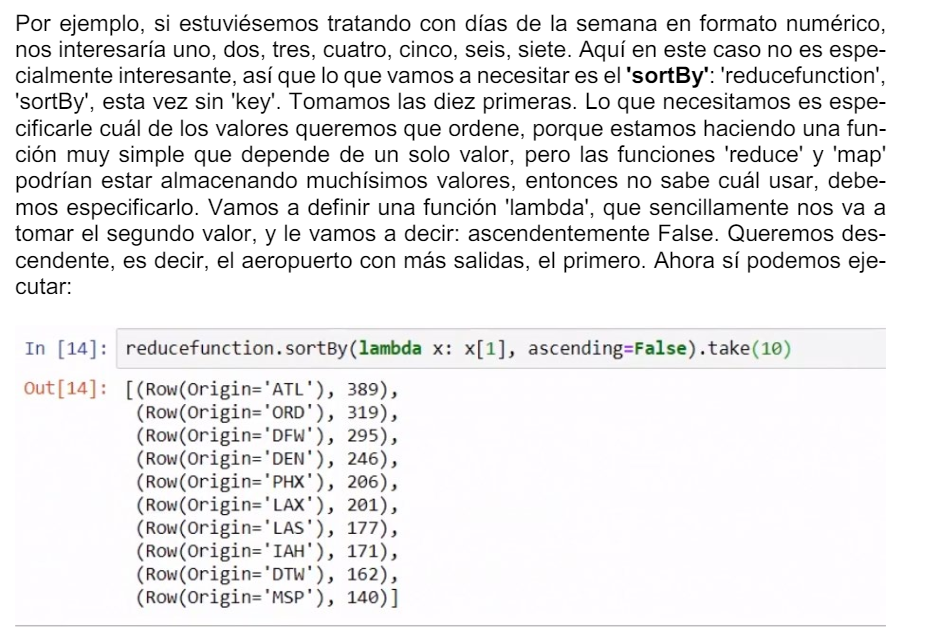

In [111]:
reducefunction.sortBy(lambda x: x[1], ascending=False).take(10)

[(Row(memoria='Supported'), 433),
 (Row(memoria='-'), 191),
 (Row(memoria='Hybrid'), 138),
 (Row(memoria='Not Supported'), 107)]

time: 1min 11s (started: 2024-05-14 23:19:45 -03:00)


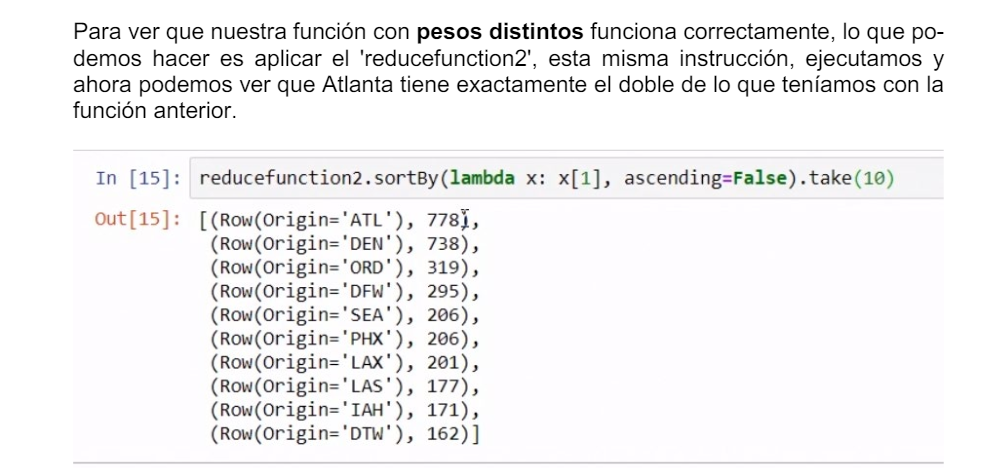

In [112]:
reducefunction2.sortBy(lambda x: x[1], ascending=False).take(10)

[(Row(memoria='Supported'), 866),
 (Row(memoria='Hybrid'), 414),
 (Row(memoria='Not Supported'), 214),
 (Row(memoria='-'), 191)]

time: 1min 13s (started: 2024-05-14 23:28:18 -03:00)


## 4.5.- MapReduce en PySpark

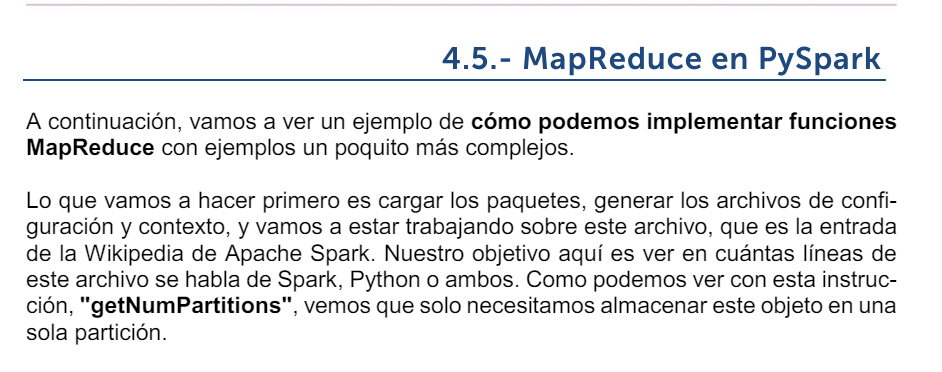

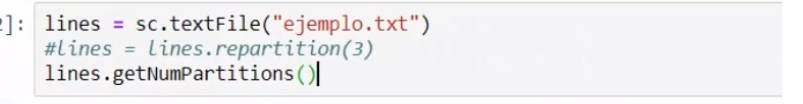

In [113]:
lines=sc.textFile(file)

time: 31 ms (started: 2024-05-14 23:38:29 -03:00)


In [114]:
lines=lines.repartition(3)

time: 31 ms (started: 2024-05-14 23:38:44 -03:00)


In [115]:
lines.getNumPartitions()

3

time: 31 ms (started: 2024-05-14 23:38:53 -03:00)


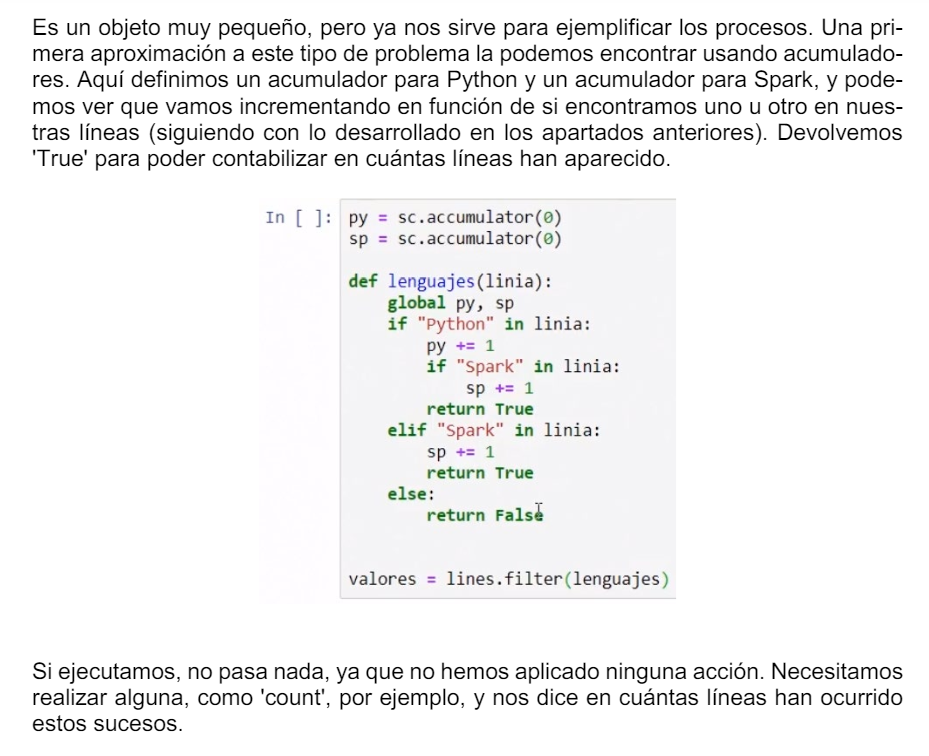

In [116]:
py=sc.accumulator(0)
sp=sc.accumulator(0)

time: 0 ns (started: 2024-05-14 23:58:23 -03:00)


In [118]:
valores=lines.filter(lenguajes)

time: 0 ns (started: 2024-05-14 23:58:39 -03:00)


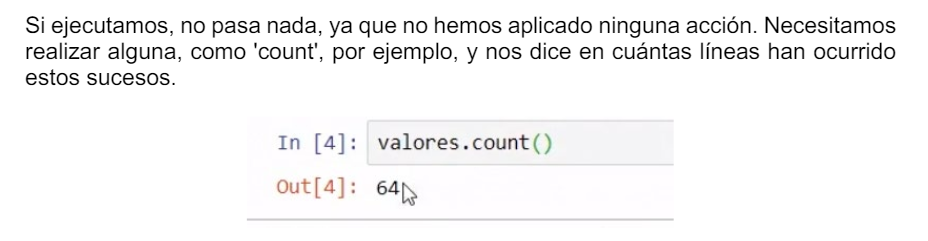

In [119]:
valores.count()

37

time: 5.22 s (started: 2024-05-14 23:59:03 -03:00)


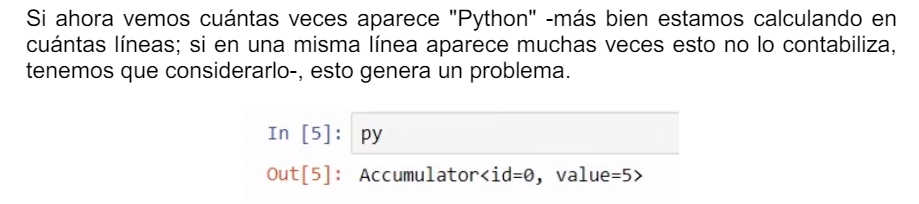

In [120]:
py

Accumulator<id=2, value=5>

time: 16 ms (started: 2024-05-14 23:59:23 -03:00)


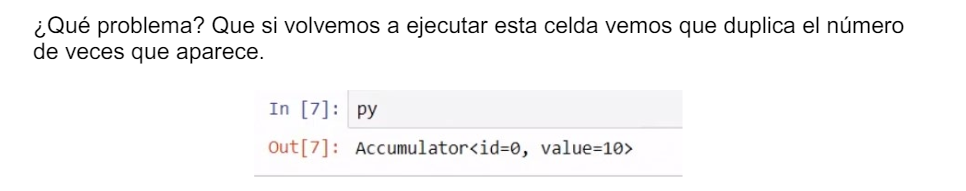

In [121]:
py

Accumulator<id=2, value=5>

time: 0 ns (started: 2024-05-14 23:59:40 -03:00)


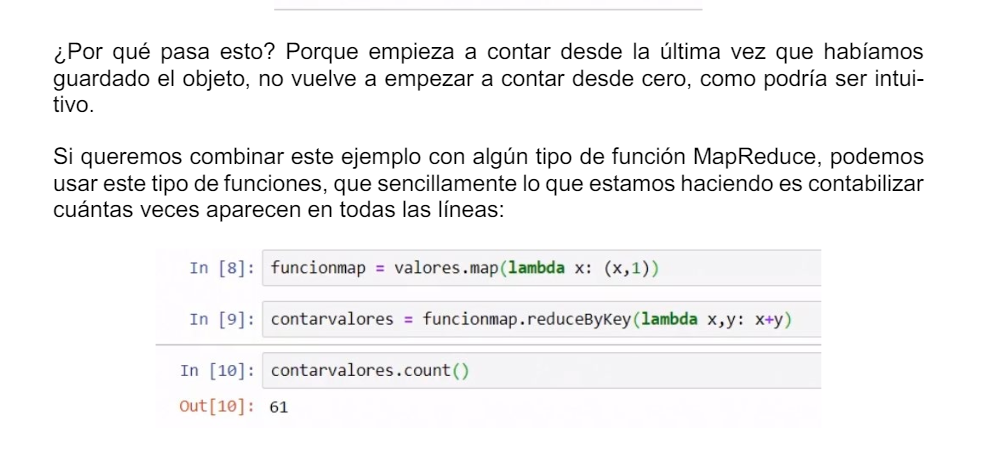

In [122]:
funcionmap=valores.map(lambda x: (x,1))

time: 0 ns (started: 2024-05-15 00:00:52 -03:00)


In [123]:
contarvalores=funcionmap.reduceByKey(lambda x,y: x+y)

time: 16 ms (started: 2024-05-15 00:01:20 -03:00)


In [124]:
contarvalores.count()

37

time: 6.34 s (started: 2024-05-15 00:01:24 -03:00)


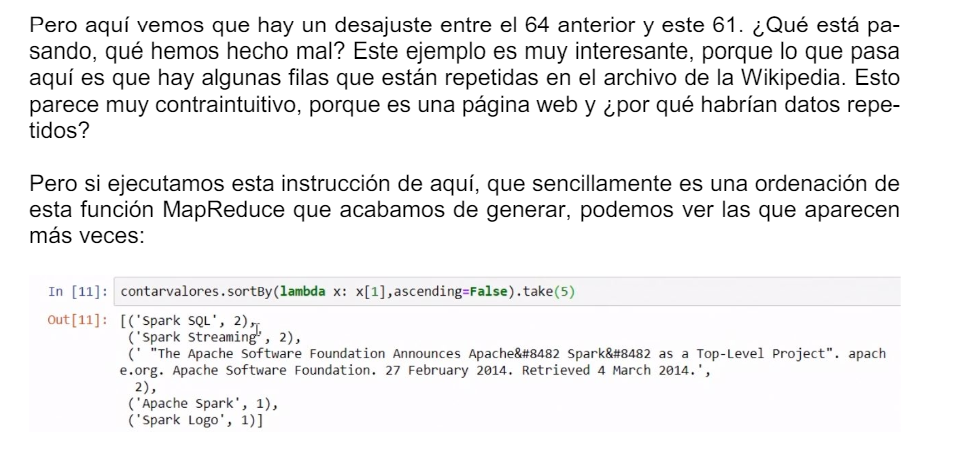

In [125]:
contarvalores.sortBy(lambda x:x[1],ascending=False).take(5)

[('El teléfono inteligente (del inglés smartphone) es un dispositivo móvil ',
  1),
 ('con mayor capacidad de almacenar y capaz de realizar tareas simultáneamente, ',
  1),
 ('tareas que realiza un ordenador o una computadora, y con una mayor conectividad que un teléfono convencional.',
  1),
 ('Debido a ello, estos teléfonos reciben el nombre de inteligente, ', 1),
 ('Los sistemas operativos móviles más utilizados al 2021 son Android e iOS ',
  1)]

time: 12.6 s (started: 2024-05-15 00:07:57 -03:00)


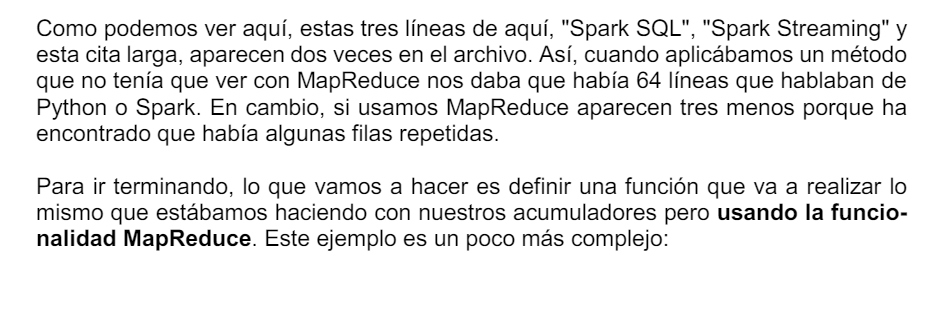

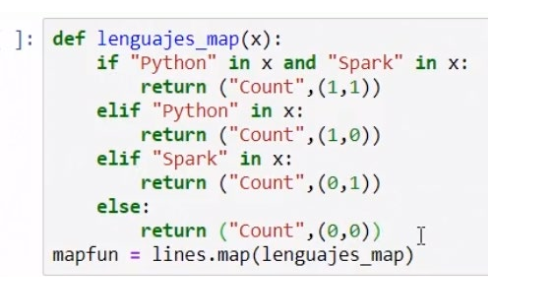

In [126]:
def lenguajes_map(x):
    if "celulares" in x and "smarthpone" in x:
        return ("Count",(1,1))
    elif "celulares" in x:
        return ("Count",(1,0))
    elif "smartphone" in x:
        return ("Count",(0,1))
    else:
        return ("Count",(0,0))

time: 0 ns (started: 2024-05-15 00:46:21 -03:00)


In [127]:
mapfun=lines.map(lenguajes_map)

time: 0 ns (started: 2024-05-15 00:46:34 -03:00)


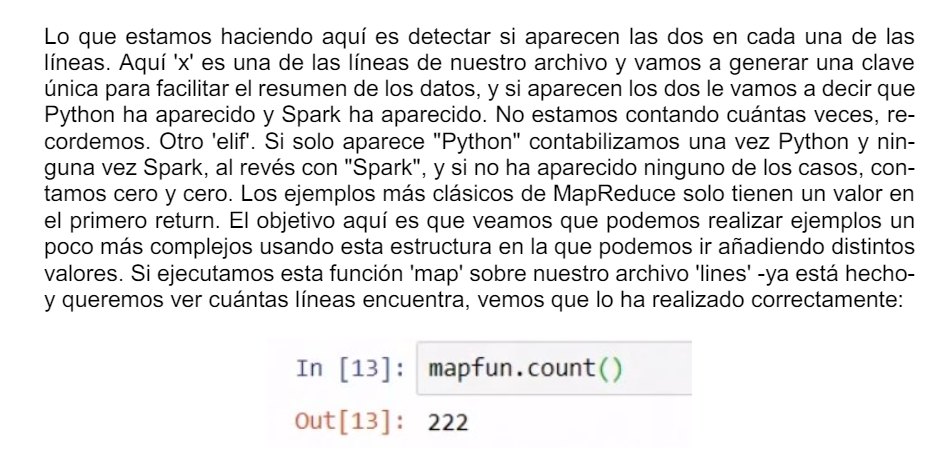

In [128]:
mapfun.count()

37

time: 3.2 s (started: 2024-05-15 00:46:38 -03:00)


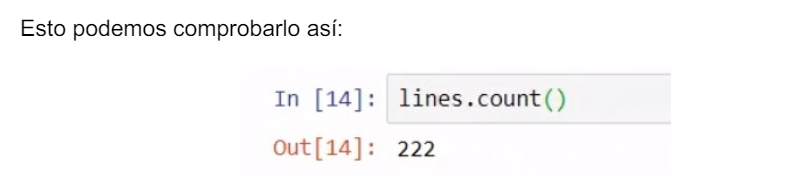

In [129]:
lines.count()

37

time: 3.25 s (started: 2024-05-15 00:46:41 -03:00)


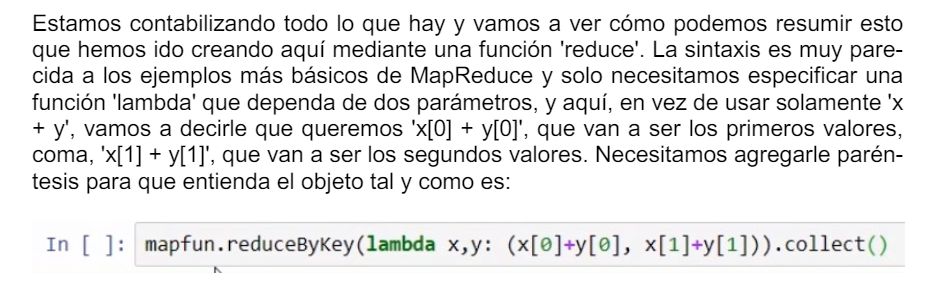

In [130]:
mapfun.reduceByKey(lambda x,y: (x[0]+y[0],x[1]+y[1])).collect()

[('Count', (3, 1))]

time: 5.98 s (started: 2024-05-15 00:46:44 -03:00)


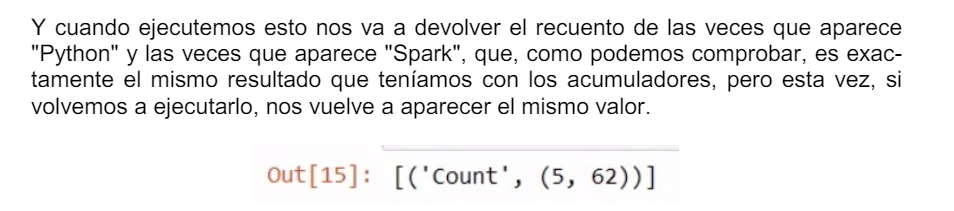

In [12]:
#sc.stop()

time: 15 ms (started: 2024-05-14 20:25:45 -03:00)
